In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 



In [407]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
red_wine = red_wine_original.copy()
white_wine = white_wine_original.copy()

In [408]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [409]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [188]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [189]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [410]:
Frames = [red_wine, white_wine]
wines = pd.concat(Frames, ignore_index= True)

In [191]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [192]:
wines_new = wines.drop_duplicates(inplace= True, ignore_index=True)

In [193]:
wines_new=wines.copy()


In [194]:
wines_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
5314,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
5315,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
5316,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [195]:
wines_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
 12  quality_label         5318 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.2+ KB


In [196]:
#Changing the dtype to category :
wines_new['quality_label'] = wines_new.quality_label.astype('category')

In [197]:
wines_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5318 non-null   float64 
 1   volatile acidity      5318 non-null   float64 
 2   citric acid           5318 non-null   float64 
 3   residual sugar        5318 non-null   float64 
 4   chlorides             5318 non-null   float64 
 5   free sulfur dioxide   5318 non-null   float64 
 6   total sulfur dioxide  5318 non-null   float64 
 7   density               5318 non-null   float64 
 8   pH                    5318 non-null   float64 
 9   sulphates             5318 non-null   float64 
 10  alcohol               5318 non-null   float64 
 11  quality               5318 non-null   int64   
 12  quality_label         5318 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.0 KB


In [198]:
cleanup_nums = {"quality_label":{"low": 0, "medium": 1,"high" : 2}}
wines_new = wines_new.replace(cleanup_nums)

In [199]:
wines_new.tail(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
5218,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.80,8,2
5219,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,8,2
5220,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,1
5221,6.2,0.300,0.42,2.2,0.036,28.0,128.0,0.99010,3.13,0.38,11.60,6,1
5222,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.80,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.20,6,1
5314,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.60,5,0
5315,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.40,6,1
5316,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.80,7,1


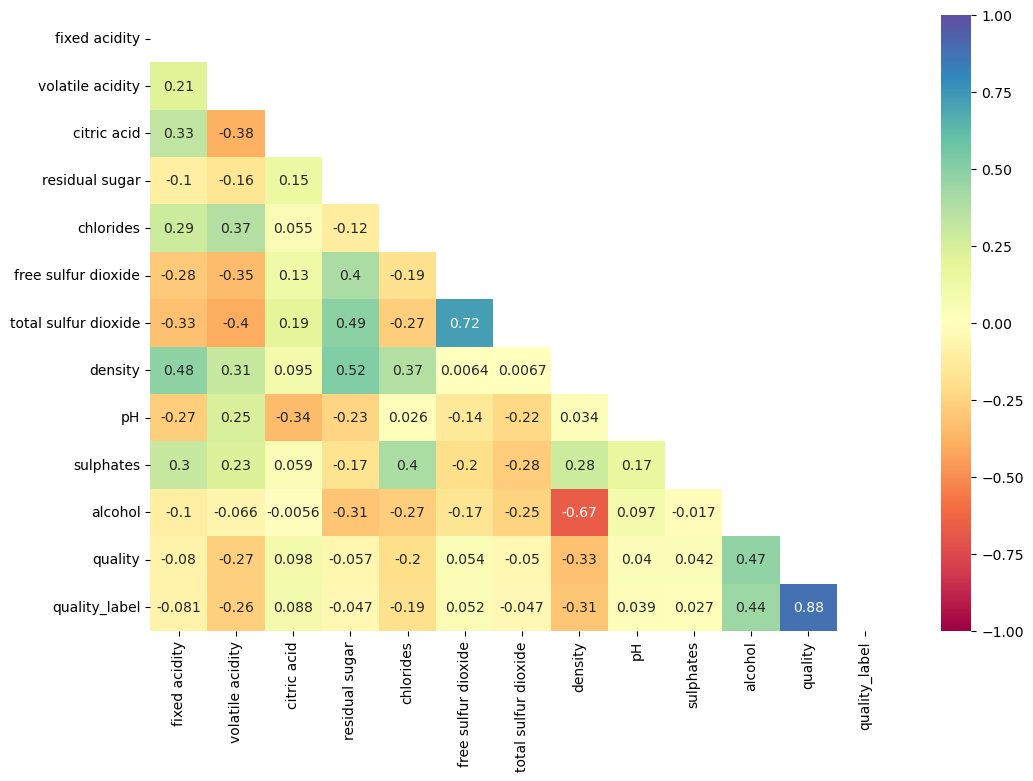

In [350]:
plt.figure(figsize=(12,8))

data = wines_new.corr()

mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data, annot=True, cmap='Spectral', vmax=1, vmin=-1, mask = mask)

plt.show()

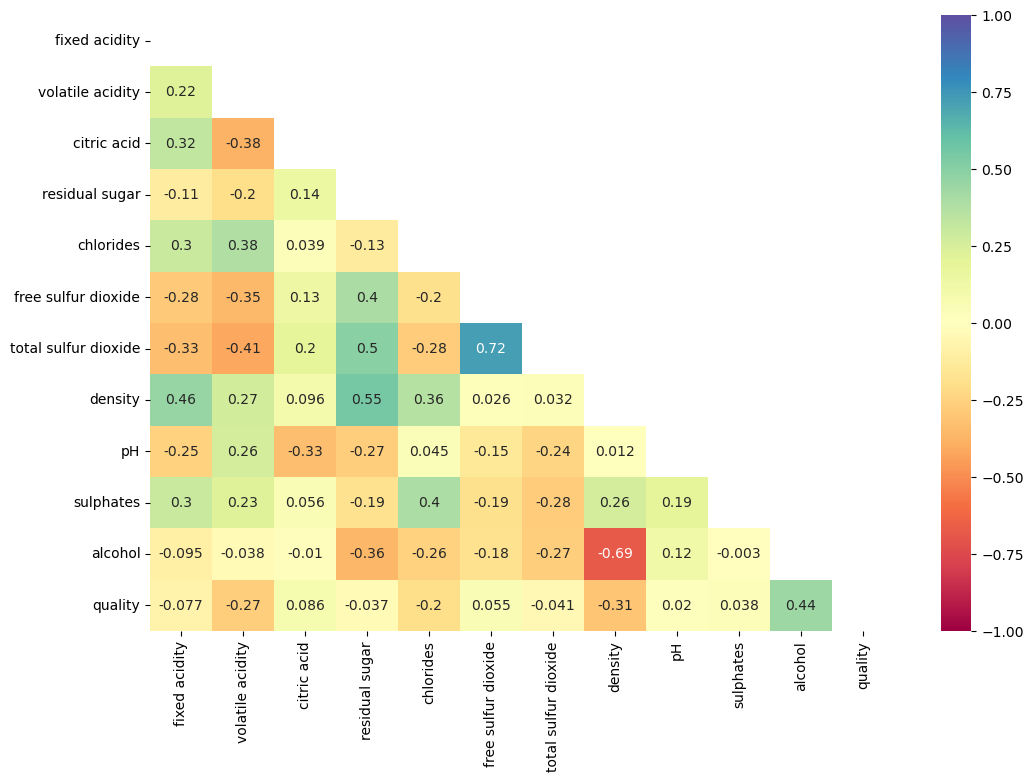

In [411]:
plt.figure(figsize=(12,8))

data = wines.corr()

mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data, annot=True, cmap='Spectral', vmax=1, vmin=-1, mask = mask)

plt.show()

In [353]:

#X = wines_new.drop(["quality_label","quality"], axis = 1)
X = wines_new.drop(["quality_label","quality","sulphates","pH"], axis = 1)
y = wines_new["quality_label"]

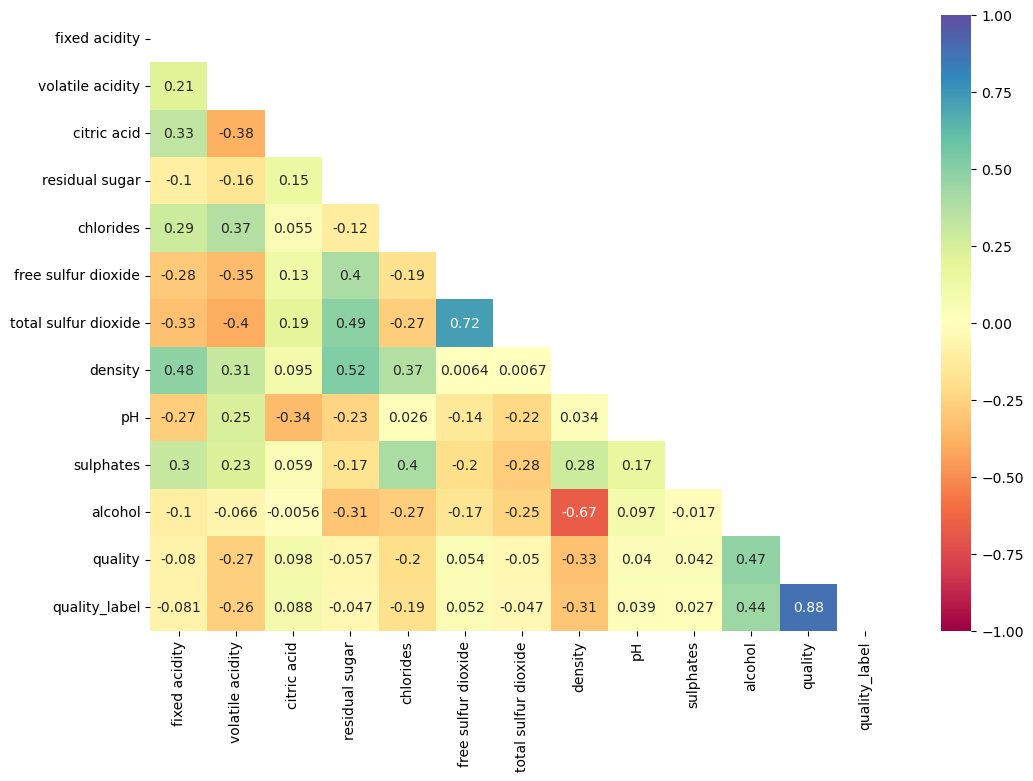

In [387]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [388]:
log = LogisticRegression(solver='lbfgs', max_iter=4000)
log.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=4000)

In [389]:
print('Logistic Regression Training Accuracy:', (log.score(X_test, y_test))*100)

Logistic Regression Training Accuracy: 71.80451127819549


In [390]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [391]:
print('K Nearest Neighbor Training Accuracy:', (knn.score(X_test, y_test))*100)

K Nearest Neighbor Training Accuracy: 62.40601503759399


In [392]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [393]:

print('Random Forest Classifier Training Accuracy:', (forest.score(X_test, y_test))*100)

Random Forest Classifier Training Accuracy: 71.52255639097744


In [394]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [395]:
print('Decision Tree Classifier Training Accuracy:', (tree.score(X_test, y_test))*100)


Decision Tree Classifier Training Accuracy: 64.84962406015038


In [321]:
#Predicting the values for test
pred_y = log.predict(X_test)
pred_y

array([1, 1, 1, ..., 0, 1, 1])

In [365]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_y)
conf_matrix

array([[223, 160,   0],
       [123, 528,   0],
       [  0,  30,   0]])

In [366]:
# K Fold cross validation :
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1



Fold:1, Train set: 4254, Test set:1064
Fold:2, Train set: 4254, Test set:1064
Fold:3, Train set: 4254, Test set:1064
Fold:4, Train set: 4255, Test set:1063
Fold:5, Train set: 4255, Test set:1063


In [398]:
model = linear_model.LogisticRegression(max_iter=5000)
score = cross_val_score(model, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(score)
print("Mean Accuracy:", mean_accuracy)



Scores for each fold: [0.71710526 0.72650376 0.71052632 0.69990593 0.73377234]
Mean Accuracy: 0.7175627214791447


In [400]:
model = DecisionTreeClassifier()
score = cross_val_score(model, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(score)
print("Mean Accuracy:", mean_accuracy)


Scores for each fold: [0.64755639 0.65789474 0.64473684 0.63969897 0.6378175 ]
Mean Accuracy: 0.6455408865531655


In [399]:
model = RandomForestClassifier()
score = cross_val_score(model, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(score)
print("Mean Accuracy:", mean_accuracy)

Scores for each fold: [0.74530075 0.74154135 0.74342105 0.72530574 0.73377234]
Mean Accuracy: 0.7378682477595684


In [403]:
# Hyperparameter tuning for RandomForestClassifier :

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


# Define the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       383
           1       0.95      0.98      0.97       651
           2       1.00      0.30      0.46        30

    accuracy                           0.96      1064
   macro avg       0.97      0.75      0.80      1064
weighted avg       0.96      0.96      0.95      1064



In [405]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       383
           1       0.77      0.83      0.80       651
           2       0.00      0.00      0.00        30

    accuracy                           0.75      1064
   macro avg       0.49      0.50      0.49      1064
weighted avg       0.72      0.75      0.73      1064



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
